# RNAseq analysis workflow using DESeq2

In [129]:
library("DESeq2")
library(scales)
options(repr.plot.width=4, repr.plot.height=3)

In [130]:
setwd(path.expand("/home/luna.kuleuven.be/r0823712/data/jupyternotebooks/assignment1/RNA-seq"))

In [131]:
matrixFile = path.expand("/home/luna.kuleuven.be/r0823712/data/jupyternotebooks/assignment1/RNA-seq/all.gene.counts")

In [132]:
countData <- as.matrix(read.csv(matrixFile, sep="\t", row.names="Geneid"))
head(countData)

,C1.bam,C2.bam,K1.bam,K2.bam
A430089I19Rik,0,0,0,0
Gm29089,0,0,0,0
1700020D14Rik,0,0,0,0
Zfy1,2,1,0,0
Uba1y,0,0,0,0
Kdm5d,1331,1653,1279,1190


In [133]:
countData['Eya1',]

C1.bam C2.bam K1.bam K2.bam 
  6563   6341    377    199

In [134]:
colnames(countData) <- c("C1","C2","K1","K2")
head(countData)

,C1,C2,K1,K2
A430089I19Rik,0,0,0,0
Gm29089,0,0,0,0
1700020D14Rik,0,0,0,0
Zfy1,2,1,0,0
Uba1y,0,0,0,0
Kdm5d,1331,1653,1279,1190


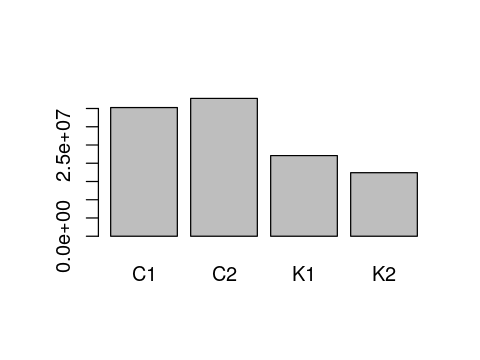

In [10]:
# Plot the total amount of reads per sample
barplot(colSums(countData))

In [136]:
condition <- factor(c("C", "C", "K", "K"))
print(condition)

[1] C C K K
Levels: C K


In [137]:
colData <- data.frame(sampleName = colnames(countData),
                      condition = condition)
colData

sampleName,condition
<fct>,<fct>
C1,C
C2,C
K1,K
K2,K


In [138]:
dds <- DESeqDataSetFromMatrix(countData = countData,
                              colData = colData,
                              design = ~ condition)
colnames(dds) <- colnames(countData)

In [139]:
dds

class: DESeqDataSet 
dim: 25239 4 
metadata(1): version
assays(1): counts
rownames(25239): A430089I19Rik Gm29089 ... Csf2ra Pisd-ps3
rowData names(0):
colnames(4): C1 C2 K1 K2
colData names(2): sampleName condition

In [140]:
dds$condition

[1] C C K K
Levels: C K

## Run the differential expression:

In [141]:
dds <- DESeq(dds)

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



## QC

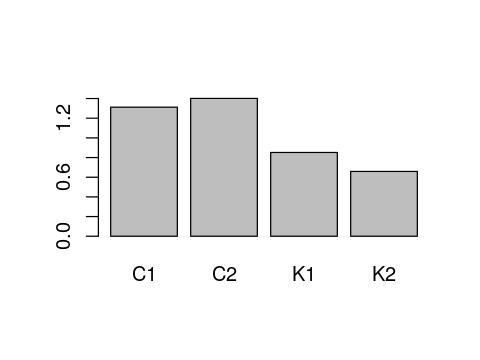

In [17]:
options(repr.plot.width=4, repr.plot.height=3)
barplot(sizeFactors(dds))

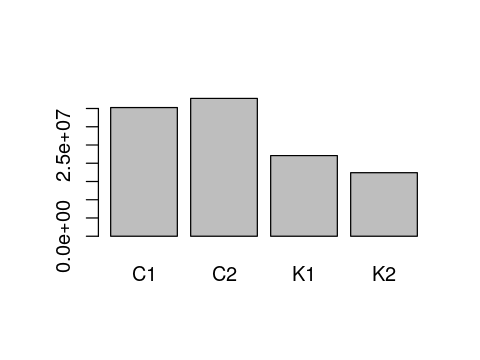

In [18]:
barplot(colSums(countData))

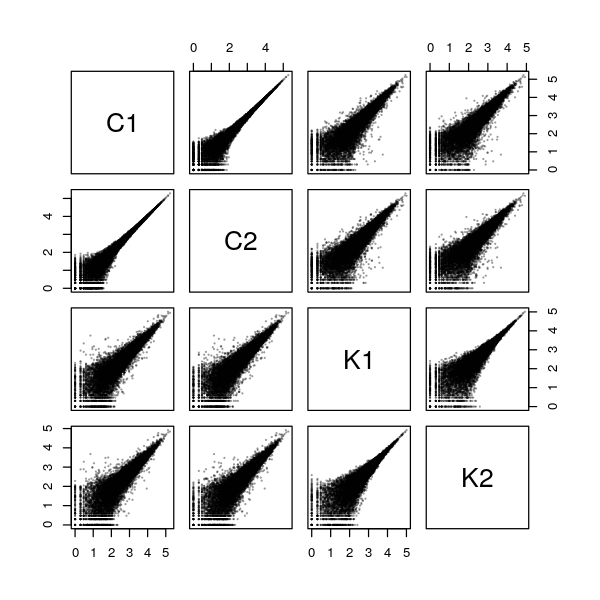

In [19]:
options(repr.plot.width=5, repr.plot.height=5)
plot(data.frame(log10(counts(dds))), cex=0.1, col=alpha("black", 0.4))
#show scater plot, C1(K1) correlated with C2(K2),but difference between C and K

In [20]:
vsd <- vst(dds,blind=FALSE)
rld <- rlog(dds,blind=FALSE)

In [21]:
sampleDists <- dist(t(assay(vsd)))

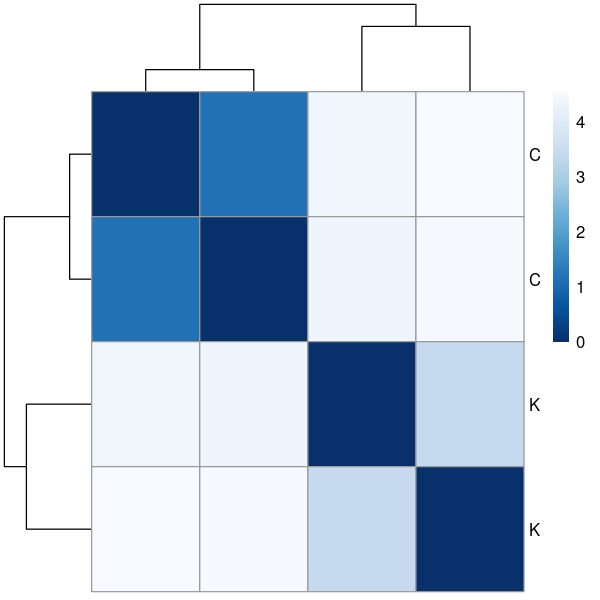

In [22]:
library("RColorBrewer")
library("pheatmap")
sampleDistMatrix <- as.matrix(sampleDists)
rownames(sampleDistMatrix) <- paste(vsd$condition)
colnames(sampleDistMatrix) <- NULL
colors <- colorRampPalette(rev(brewer.pal(9, "Blues"))) (255)
pheatmap(sampleDistMatrix,
        clustering_distance_rows=sampleDists,
        clustering_distance_cols=sampleDists,
        col=colors)

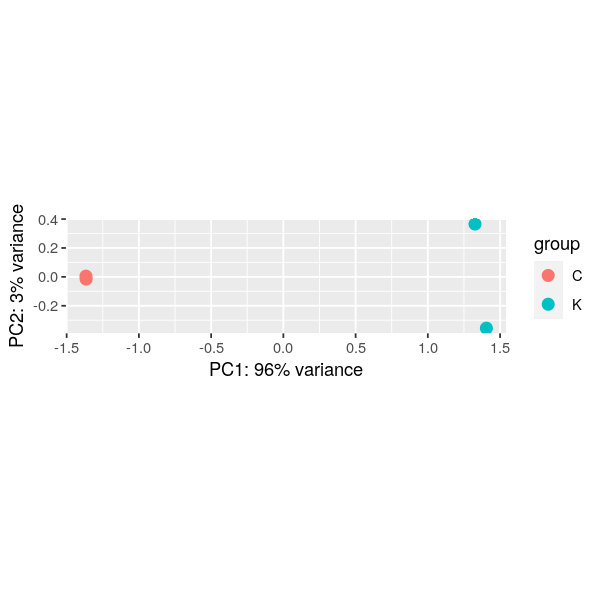

In [23]:
plotPCA(vsd,intgroup=c("condition"))
# Use PCA to validate the similarity of the four samples
# The C1 and C2 is similar, the K1 and K2 is similar => good

### MA plot

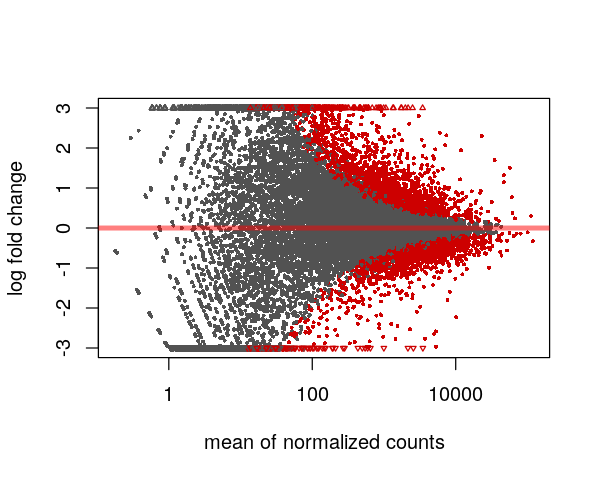

In [142]:
options(repr.plot.width=5, repr.plot.height=4)
plotMA(dds,ylim=c(-3,3))
#mean nomalized counts 
#mean expression vs the log fold change
#red = significantly differentially expressed genes

### Volcano plot

In [143]:
res_df <- data.frame(res)
head(res_df)

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,threshold
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
Podxl,23047.326,2.302564,0.06216419,37.04004,2.598090e-300,4.303737e-296,TRUE
Chga,2168.941,6.867230,0.23385979,29.36473,1.549686e-189,1.283528e-185,TRUE
Hsd3b1,3456.628,9.802853,0.35068740,27.95325,6.019112e-172,3.323553e-168,TRUE
Col3a1,47044.426,1.322803,0.04757039,27.80727,3.542462e-170,1.467022e-166,TRUE
Col1a2,34824.400,1.697700,0.06332295,26.81019,2.458151e-158,8.143853e-155,TRUE
Meg3,11845.831,1.945866,0.07824664,24.86836,1.636884e-136,4.519163e-133,TRUE


In [144]:
res_df_ordered <- res_df[order(res_df$padj), ] 
res_df_ordered$genelabels <- rownames(res_df_ordered) %in% rownames(res_df_ordered[1:10,])
head(res_df_ordered)

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,threshold,genelabels
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>
Podxl,23047.326,2.302564,0.06216419,37.04004,2.598090e-300,4.303737e-296,TRUE,TRUE
Chga,2168.941,6.867230,0.23385979,29.36473,1.549686e-189,1.283528e-185,TRUE,TRUE
Hsd3b1,3456.628,9.802853,0.35068740,27.95325,6.019112e-172,3.323553e-168,TRUE,TRUE
Col3a1,47044.426,1.322803,0.04757039,27.80727,3.542462e-170,1.467022e-166,TRUE,TRUE
Col1a2,34824.400,1.697700,0.06332295,26.81019,2.458151e-158,8.143853e-155,TRUE,TRUE
Meg3,11845.831,1.945866,0.07824664,24.86836,1.636884e-136,4.519163e-133,TRUE,TRUE


Warning message:
“Removed 8674 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 8674 rows containing missing values (`geom_text_repel()`).”


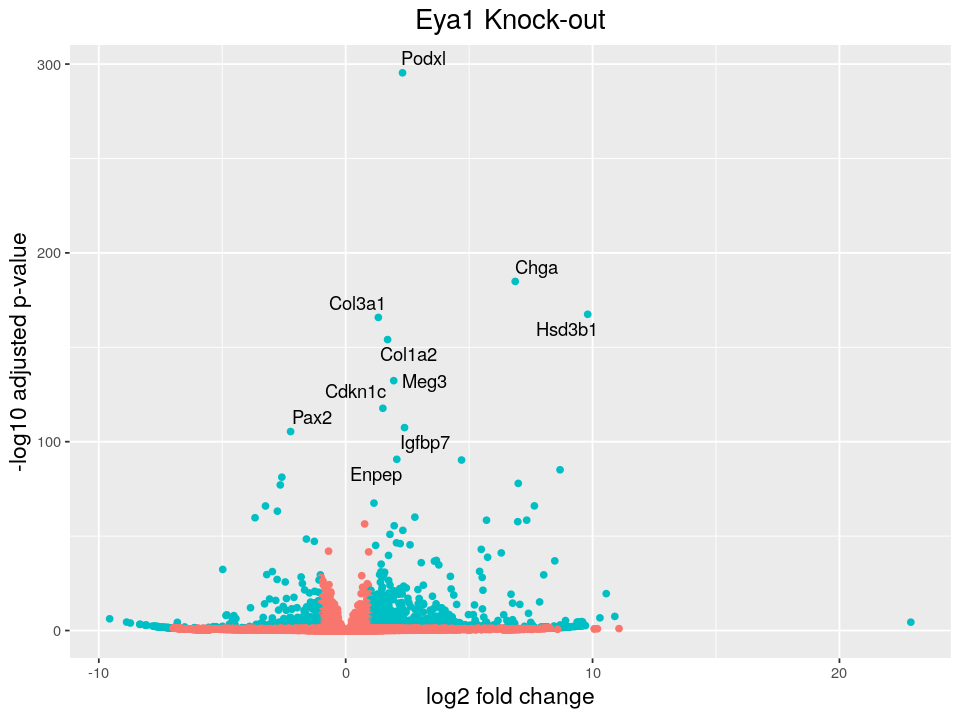

In [146]:
library(ggplot2)
library(ggrepel)
options(repr.plot.width=8, repr.plot.height=6)
ggplot(res_df_ordered) +
  geom_point(aes(x = log2FoldChange, y = -log10(padj), colour = threshold)) +
  geom_text_repel(aes(x = log2FoldChange, y = -log10(padj), label = ifelse(genelabels == T, rownames(res_df_ordered),""))) +
  ggtitle("Eya1 Knock-out") +
  xlab("log2 fold change") + 
  ylab("-log10 adjusted p-value") +
  theme(legend.position = "none",
        plot.title = element_text(size = rel(1.5), hjust = 0.5),
        axis.title = element_text(size = rel(1.25))) 

* Up-regulated\
#`Podxl and Chga` => associated with `kidney diseases`\
#Hsd3b1 => enzyme responsible for the oxidation\
#Col3a1 => Collagen type III occurs in most soft connective tissues along with type I collagen. Involved in regulation of cortical development.\
#Col1a2 => This gene encodes the pro-alpha2 chain of type I collagen\
#Meg3 => an RNA Gene, and is affiliated with the lncRNA class. Diseases associated with MEG3 include Kagami-Ogata Syndrome and Liver Disease.\
#Cdkn1c => a potent tight-binding inhibitor of the G1 cyclin/CDK complexes\
#Igfbp7 =>Stimulates prostacyclin (PGI2) production. Stimulates cell adhesion.\
#Enpep => Regulates central hypertension through its calcium-modulated preference to cleave N-terminal acidic residues from peptides such as angiotensin II 
* Down-regulated\
#`Pax2` => Transcription factor that may have a role in `kidney cell differentiation` (PubMed:24676634). \
    Has a critical role in the development of the urogenital tract, the eyes, and the CNS.

In [111]:
is.na(res_df_ordered)
# NA value corresponding to micro RNA

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,threshold,genelabels
Podxl,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
Chga,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
Hsd3b1,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
Col3a1,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
Col1a2,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
Meg3,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
Cdkn1c,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
Igfbp7,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
Pax2,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
Enpep,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE


### Export the results

In [44]:
res <- results(dds)
res <- res[order(res$padj),]
head(res)

log2 fold change (MLE): condition K vs C 
Wald test p-value: condition K vs C 
DataFrame with 6 rows and 6 columns
               baseMean   log2FoldChange              lfcSE             stat
              <numeric>        <numeric>          <numeric>        <numeric>
Podxl  23047.3263742249 2.30256409047557 0.0621641923789495 37.0400386839946
Chga   2168.94078744519 6.86723027446822  0.233859785097435  29.364733537265
Hsd3b1 3456.62840053675 9.80285254554275  0.350687398009068 27.9532501059227
Col3a1 47044.4256492803 1.32280282892632 0.0475703871923074 27.8072747984745
Col1a2 34824.4000986847 1.69770027334297 0.0633229542405145 26.8101874542165
Meg3   11845.8311170326 1.94586592055782 0.0782466377789379 24.8683646453317
                      pvalue                  padj
                   <numeric>             <numeric>
Podxl  2.59809030498184e-300 4.30373659020241e-296
Chga   1.54968640091818e-189 1.28352776156048e-185
Hsd3b1 6.01911183844263e-172 3.32355292012674e-168
Col3a1  3.5424

In [26]:
# Number of genes are differentially expressed = 2875
res.sign <- res[(!is.na(res$padj)) & (res$padj < 0.05),]
dim(res.sign)

[1] 2875    6

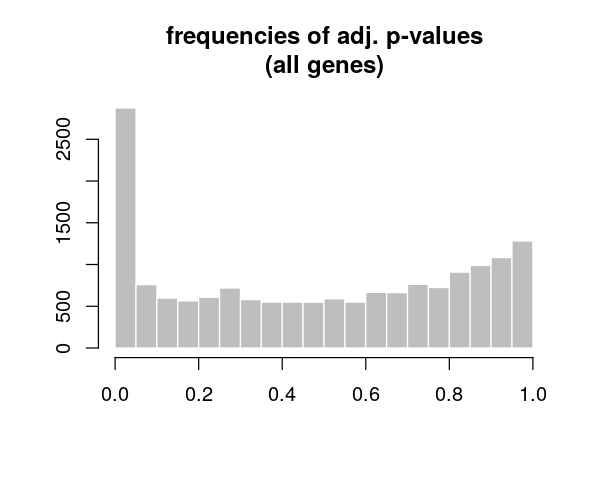

In [27]:
hist(res$padj, 
     col="grey", border="white", xlab="", ylab="", main="frequencies of adj. p-values\n(all genes)")
#most of the adj. p-value are near zero => good

In [28]:
res['Eya1',]

log2 fold change (MLE): condition K vs C 
Wald test p-value: condition K vs C 
DataFrame with 1 row and 6 columns
             baseMean    log2FoldChange             lfcSE              stat
            <numeric>         <numeric>         <numeric>         <numeric>
Eya1 2567.67657145955 -3.67207136558722 0.218538123948416 -16.8028868338505
                   pvalue                 padj
                <numeric>            <numeric>
Eya1 2.32449958666948e-63 1.83358741205619e-60

In [29]:
res['Six2',]

log2 fold change (MLE): condition K vs C 
Wald test p-value: condition K vs C 
DataFrame with 1 row and 6 columns
             baseMean    log2FoldChange             lfcSE              stat
            <numeric>         <numeric>         <numeric>         <numeric>
Six2 3485.31614802649 -4.58791380044839 0.834705101346938 -5.49644873745831
                   pvalue                 padj
                <numeric>            <numeric>
Six2 3.87515673184006e-08 1.22503761952158e-06

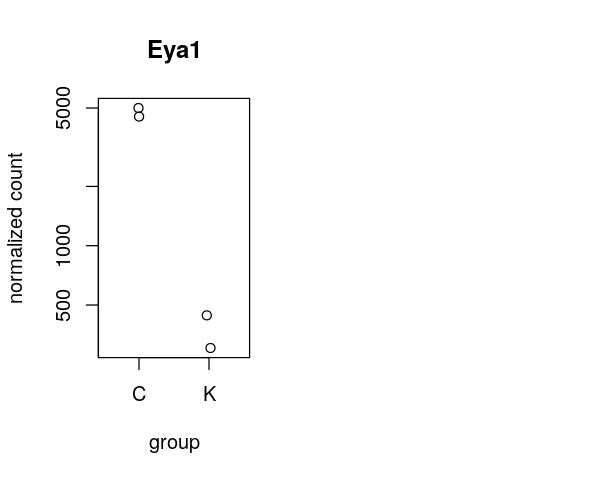

In [30]:
par(mfrow=c(1,2))
plotCounts(dds, gene="Eya1", normalized = TRUE)  
#this is normalized count (by library size,scale)

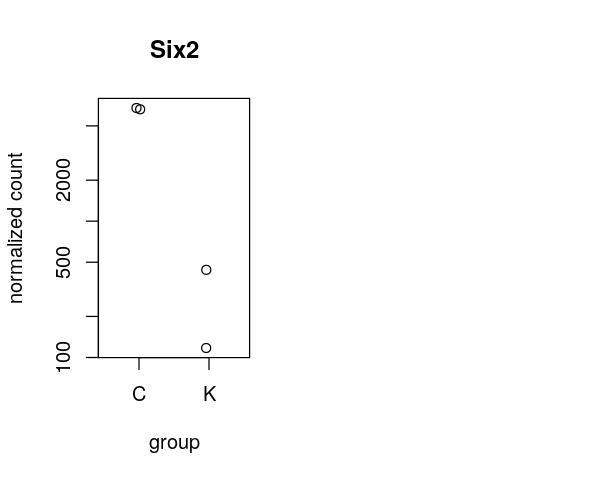

In [31]:
par(mfrow=c(1,2))
plotCounts(dds, gene="Six2", normalized = TRUE)  

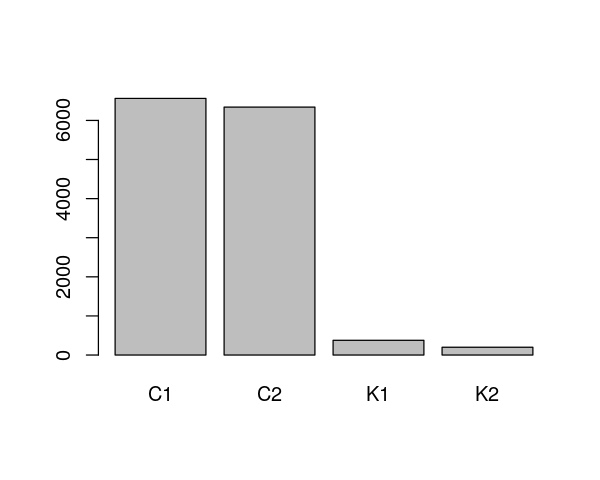

In [26]:
barplot(counts(dds)["Eya1",])

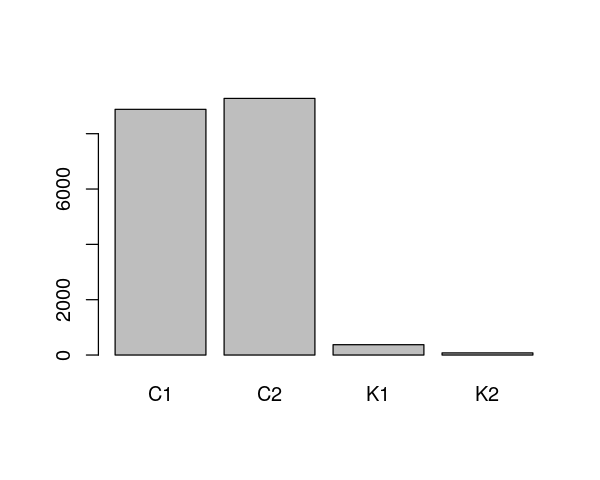

In [27]:
barplot(counts(dds)["Six2",])

In [23]:
write.table(res, "deseq.results.tsv", sep="\t", col.names=NA, quote=FALSE)

### Heatmap
Extract the normalized values of all the significant genes and plot a heatmap of their expression

In [43]:
normalized_counts <- counts(dds, normalized=T)

In [45]:
normalized_counts

,C1,C2,K1,K2
A430089I19Rik,0.0000000,0.0000000,0.0000,0.0000
Gm29089,0.0000000,0.0000000,0.0000,0.0000
1700020D14Rik,0.0000000,0.0000000,0.0000,0.0000
Zfy1,1.5240730,0.7135734,0.0000,0.0000
Uba1y,0.0000000,0.0000000,0.0000,0.0000
Kdm5d,1014.2705735,1179.5369015,1501.6602,1806.2880
Eif2s3y,681.2606256,652.2061270,1349.0286,1505.7459
Tspy-ps,0.0000000,0.0000000,0.0000,0.0000
Uty,421.4061812,520.1950401,752.5912,333.9356
Ddx3y,2078.0735191,2159.9868124,3295.6686,2316.2987


In [46]:
threshold <- res$padj < 0.05 & abs(res$log2FoldChange) >1

In [47]:
length(which(threshold)) # total 1269 significant genes

[1] 1269

In [49]:
res$threshold <- threshold  

In [50]:
significant_res <- data.frame(subset(res, threshold==TRUE)) #sing_OE

In [55]:
head(significant_res)

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,threshold
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
Podxl,23047.326,2.302564,0.06216419,37.04004,2.598090e-300,4.303737e-296,TRUE
Chga,2168.941,6.867230,0.23385979,29.36473,1.549686e-189,1.283528e-185,TRUE
Hsd3b1,3456.628,9.802853,0.35068740,27.95325,6.019112e-172,3.323553e-168,TRUE
Col3a1,47044.426,1.322803,0.04757039,27.80727,3.542462e-170,1.467022e-166,TRUE
Col1a2,34824.400,1.697700,0.06332295,26.81019,2.458151e-158,8.143853e-155,TRUE
Meg3,11845.831,1.945866,0.07824664,24.86836,1.636884e-136,4.519163e-133,TRUE


In [56]:
norm_significant_res <- normalized_counts[rownames(significant_res),]

In [66]:
head(norm_significant_res)

,C1,C2,K1,K2
Podxl,7745.338925,7791.508426,37600.209,39052.250
Chga,35.815715,37.819392,4042.389,4559.739
Hsd3b1,5.334255,9.990028,6604.252,7206.937
Col3a1,27047.723318,26694.782508,67604.060,66831.137
Col1a2,16498.852131,16322.992512,50995.393,55480.363
Meg3,4838.169700,4925.797478,18609.315,19010.043


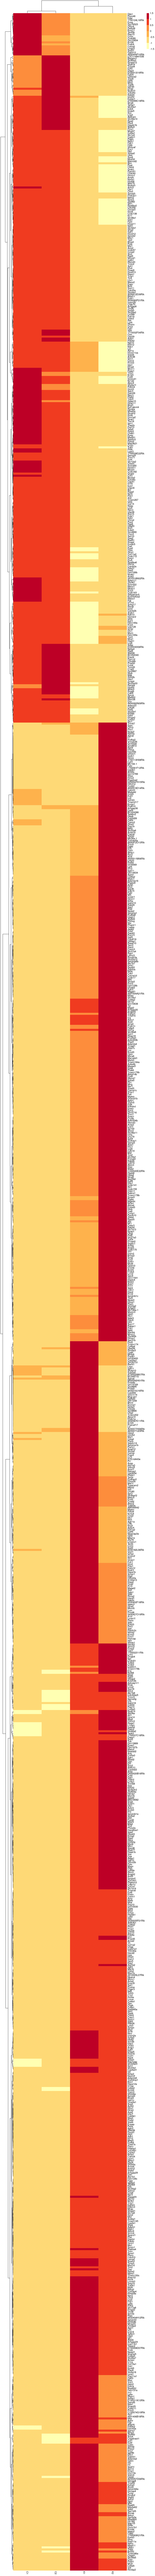

In [82]:
### Set a color palette
heat.colors <- brewer.pal(6, "YlOrRd")

### Run pheatmap
options(repr.plot.width=9, repr.plot.height=150)
pheatmap(norm_significant_res, color = heat.colors, cluster_rows = T, show_rownames=T,
 border_color=NA, fontsize = 10, scale="row",
     fontsize_row = 10, height=20)

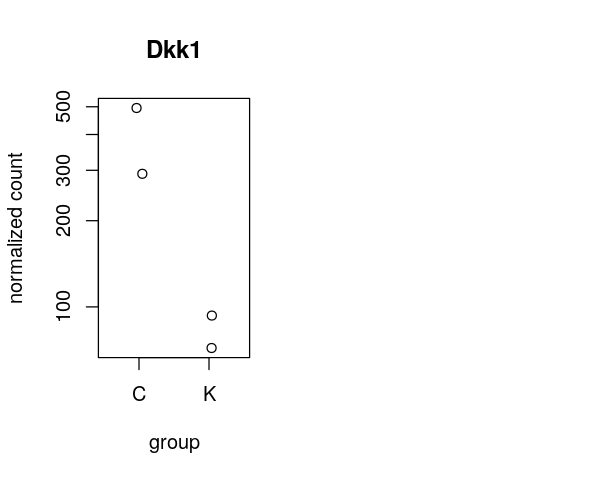

In [127]:
par(mfrow=c(1,2))
plotCounts(dds, gene="Dkk1", normalized = TRUE)  
# confirm the first gene "Dkk1" in heatmap KO group is decreased expression

With Heatmap, we can view every significant genes are up or down regulated in 4 samples.